# Market Customer Personality Analysis

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

Steps followed in this notebook:

1. Detailed descriptions of customers
2. CLustering 
3. Descriptives among clusters


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd 
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
import scipy.stats

# visuals
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-personality-analysis/marketing_campaign.csv


In [2]:
market = pd.read_csv('../input/customer-personality-analysis/marketing_campaign.csv', delimiter="\t")
market = market.drop(['ID','Dt_Customer'], axis=1)

## Descriptive Statistics

In [3]:
market.head(n=10)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,1967,Master,Together,62513.0,0,1,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,1971,Graduation,Divorced,55635.0,0,1,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,1985,PhD,Married,33454.0,1,0,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,1974,PhD,Together,30351.0,1,0,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,1950,PhD,Together,5648.0,1,1,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [4]:
market.shape

(2240, 27)

In [5]:
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Recency              2240 non-null   int64  
 7   MntWines             2240 non-null   int64  
 8   MntFruits            2240 non-null   int64  
 9   MntMeatProducts      2240 non-null   int64  
 10  MntFishProducts      2240 non-null   int64  
 11  MntSweetProducts     2240 non-null   int64  
 12  MntGoldProds         2240 non-null   int64  
 13  NumDealsPurchases    2240 non-null   int64  
 14  NumWebPurchases      2240 non-null   int64  
 15  NumCatalogPurchases  2240 non-null   i

In [6]:
market.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


### Introduction to Data

The customer data has 2240 rows and 28 columns. I checked and deleted the  cell after, each row is for a different customer, there are no duplicates in the data.

From the descriptives table, we see none of the columns have missings, and no values below 0.

However, we might need a deeper knowledge about what the columns are ; such as AcceptedCmp, Recency, Z_CostContact and Response. We don't know what these columns are.

Quick insights : 
Income column's higher value is 6666666, and percentiles are in between 35k to 68k. The highest value is a possible outlier.

Mean Web site visits per month is 5 for 2k customers. The max value is 20. 

AcceptedCmp columns are binomial, 0 and 1.



#### Creating New Columns

In [7]:
# total number of children
market['no_children'] = market['Kidhome'] + market['Teenhome']
# total items bought
market['total_items_bought'] = market['MntWines'] + market['MntFruits'] + market['MntMeatProducts'] + market['MntFishProducts'] + market['MntSweetProducts'] + market['MntGoldProds']
# total number of purchases
market['total_nbr_purchases'] = market['NumDealsPurchases'] + market['NumWebPurchases'] + market['NumCatalogPurchases'] + market['NumStorePurchases']
#customer age
market['age'] = 2021 - market['Year_Birth']

market = market.drop(['Year_Birth'], axis=1)

In [8]:
market.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,no_children,total_items_bought,total_nbr_purchases,age
count,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,0.950446,605.798214,14.862054,52.194196
std,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,0.751803,602.249288,7.677173,11.984069
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000,5.000000,0.000000,25.000000
25%,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000,68.750000,8.000000,44.000000
50%,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1.000000,396.000000,15.000000,51.000000
75%,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1.000000,1045.500000,21.000000,62.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,3.000000,2525.000000,44.000000,128.000000


128 years old, earns 666666k money. The first one is not likely to occur, second one is outlier. Lets see who is earning 66666k money.

In [9]:
market[market['Income']>600000]

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,no_children,total_items_bought,total_nbr_purchases,age
2233,Graduation,Together,666666.0,1,0,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,3,11,0,1,62,11,44


In [10]:
market[market['age']>90]

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,no_children,total_items_bought,total_nbr_purchases,age
192,2n Cycle,Divorced,36640.0,1,0,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,3,11,0,1,65,6,121
239,2n Cycle,Single,60182.0,0,1,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,3,11,0,1,22,4,128
339,PhD,Together,83532.0,0,0,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,3,11,0,0,1853,15,122


In [11]:
market = market[market['Income']<600000]
market = market[market['age']<90]

## Visuals

In [12]:
def hist_with_vline(data, column):
    """This function gets data and column name.
    Plots a histogram with 100 bins, draws a Vline of the column mean and median"""
   
    plt.figure(figsize=(12,6))
    _ = sns.histplot(market[column], bins= 100)
    plt.title('Histogram of ' + column)
    miny, y_lim = plt.ylim()
    plt.text(s = f"Mean  {column} : {market[column].mean():.2f}", x =market[column].mean() * 1.1,  y = y_lim * 0.95, color = 'r')
    _ =plt.axvline(market[column].mean(), color = 'r')
    _ = plt.axvline(market[column].median())
    plt.text(s = f"Median {column} : {market[column].median():.2f}", x= market[column].median() * 1.1, y= y_lim * 0.90, color = 'b')

First Income:

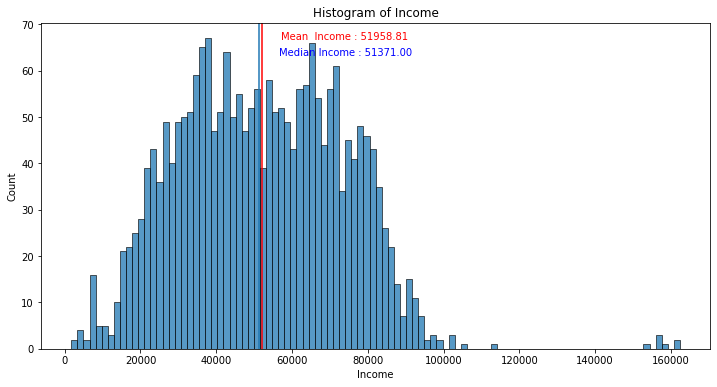

In [13]:
hist_with_vline(market, 'Income')

The customers earn more than 120k; these ones are outliers also. I'll remove these too.

PS: I can remove outliers by Z score method or Tukey's IQR method; however, I wanted to remove the outliers by certain columns (the ones seemed important to me such as age, income)

In [14]:
market = market[market['Income']<120000]

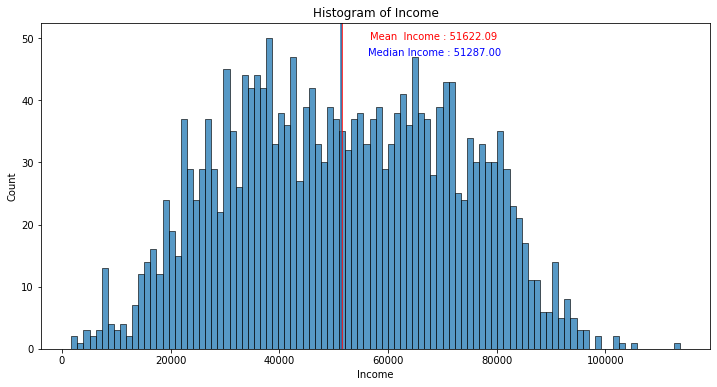

In [15]:
hist_with_vline(market, 'Income')

### Observation

Most of the customers earn between 40k to 70k. 

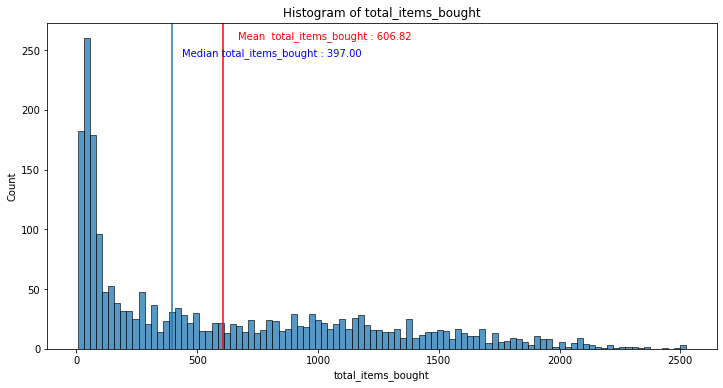

In [16]:
hist_with_vline(market, 'total_items_bought')

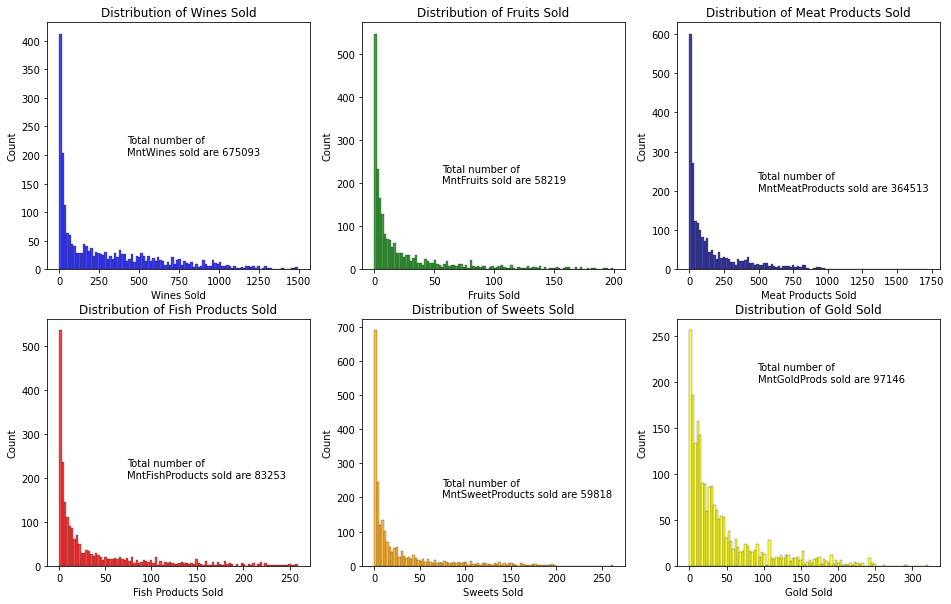

In [17]:
columns = ['MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts','MntGoldProds']
titles = ['Wines Sold', 'Fruits Sold', 'Meat Products Sold', 'Fish Products Sold', 'Sweets Sold', 'Gold Sold']
colors = ['blue', 'green', 'darkblue','red','orange','yellow']

fig, ax = plt.subplots(2,3, figsize=(16,10))
for i in range(len(columns)):
    sns.histplot(market[columns[i]], bins= 100, ax = ax[i//3, i%3],color=colors[i])
    ax[i//3, i%3].set_title('Distribution of ' + titles[i])
    ax[i//3, i%3].set_xlabel(titles[i])
    ax[i//3, i%3].text(s = f"Total number of \n{columns[i]} sold are {market[columns[i]].sum()} ",
                       x = market[columns[i]].max()/3.5, y = 200)
    

All the sold products histograms are right skewed. Majority of the customers buys items lower than certain amounts. 

On the other hand, Wines are the most sold items (675k) and Meat producs follow with 364k, while the Fruit and Sweet products are the least sold items (58k and 59k respectively). 

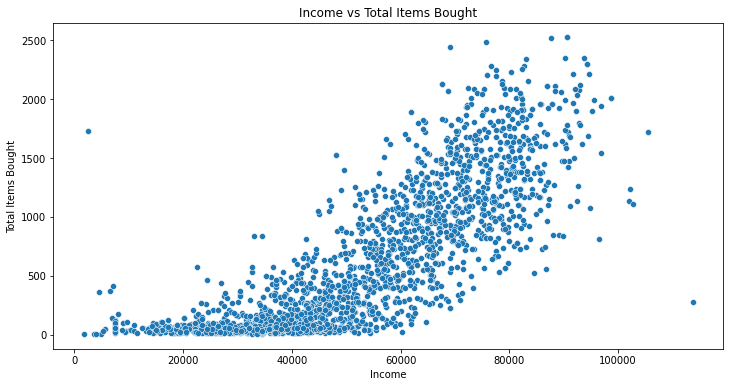

In [18]:
plt.figure(figsize=(12,6))

_ = sns.scatterplot(x ='Income',y = 'total_items_bought', data = market)
_ = plt.title('Income vs Total Items Bought')
_ = plt.ylabel('Total Items Bought')

There is a linear relation with income and number of items bought.

In [19]:
px.scatter(market, 
           x = 'Income', 
           y= 'total_items_bought', 
           color = 'Education', 
           title = 'Income According to Educational Status', )

In [20]:
market.Education.value_counts()

Graduation    1113
PhD            476
Master         364
2n Cycle       198
Basic           54
Name: Education, dtype: int64

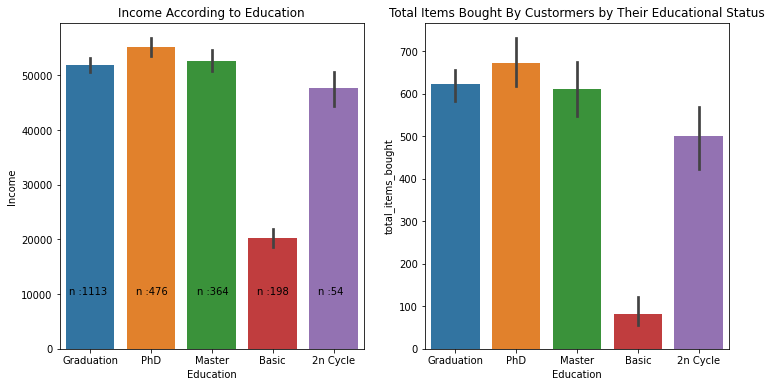

In [21]:
fig, (ax0, ax1 )= plt.subplots(1,2 , figsize=(12,6))
_= sns.barplot(x = 'Education', y = 'Income', data = market, ax = ax0)
ax0.set_title('Income According to Education')
_ = sns.barplot(x = 'Education', y = 'total_items_bought', data = market, ax=ax1)
ax1.set_title('Total Items Bought By Custormers by Their Educational Status')

_ = ax0.text(s = f"n :{market.Education.value_counts()[0]}", x = -0.35, y = 10000)
_ = ax0.text(s = f"n :{market.Education.value_counts()[1]}", x = 0.75, y = 10000)
_ = ax0.text(s = f"n :{market.Education.value_counts()[2]}", x = 1.75, y = 10000)
_ = ax0.text(s = f"n :{market.Education.value_counts()[3]}", x = 2.75, y = 10000)
_ = ax0.text(s = f"n :{market.Education.value_counts()[4]}", x = 3.75, y = 10000)

Customers with a PhD earn and spend more than any other customers with different educational background. And, not so surprisingly Basic level educated customers earn and spend the least amount of money. 

And when we investigate the number of customers in each group, it is wise to investigate what customers buy with different educational backgrounds.

In [22]:
px.scatter(market, 
           x = 'Income', 
           y= 'total_items_bought', 
           color = 'Marital_Status', 
           title = 'Income According to Marital Status', )


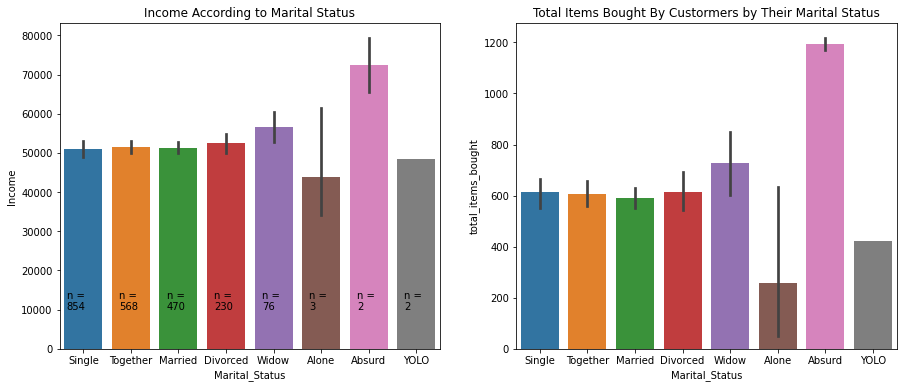

In [23]:
fig, (ax0, ax1 )= plt.subplots(1,2 , figsize=(15,6))
_ = sns.barplot(x = 'Marital_Status', y = 'Income', data = market, ax = ax0)
_ = ax0.set_title('Income According to Marital Status')
_ = sns.barplot(x = 'Marital_Status', y = 'total_items_bought', data = market, ax=ax1)
_ = ax1.set_title('Total Items Bought By Custormers by Their Marital Status')

_ = ax0.text(s = f"n = \n{market.Marital_Status.value_counts()[0]}", x = -0.35, y = 10000)
_ = ax0.text(s = f"n = \n{market.Marital_Status.value_counts()[1]}", x = 0.75, y = 10000)
_ = ax0.text(s = f"n = \n{market.Marital_Status.value_counts()[2]}", x = 1.75, y = 10000)
_ = ax0.text(s = f"n = \n{market.Marital_Status.value_counts()[3]}", x = 2.75, y = 10000)
_ = ax0.text(s = f"n = \n{market.Marital_Status.value_counts()[4]}", x = 3.75, y = 10000)
_ = ax0.text(s = f"n = \n{market.Marital_Status.value_counts()[5]}", x = 4.75, y = 10000)
_ = ax0.text(s = f"n = \n{market.Marital_Status.value_counts()[6]}", x = 5.75, y = 10000)
_ = ax0.text(s = f"n = \n{market.Marital_Status.value_counts()[7]}", x = 6.75, y = 10000)


I don't know what these labels are :) YOLO, absurd as marital status? 

Absurds earn more money, and widows follow them as a 2nd in the list; IF we see only the total amount they earn. However we can ignore Alone, absurd and YOLO ones. It's better to see what the other ones bought.

If we think about the number differences of each group, getting sum of Wine, Meat etc would not be a good idea. I'd prefer means here. First, see table by grouby function.

In [24]:
market.groupby(['Education']).agg(['mean','sum'])

Income               Kidhome       Teenhome         Recency  \
                    mean         sum      mean  sum      mean  sum       mean   
Education                                                                       
2n Cycle    47625.333333   9429816.0  0.474747   94  0.409091   81  48.383838   
Basic       20306.259259   1096538.0  0.629630   34  0.092593    5  48.444444   
Graduation  51984.008086  57858201.0  0.441150  491  0.493261  549  49.909254   
Master      52629.579670  19157167.0  0.456044  166  0.535714  195  47.346154   
PhD         55220.581933  26284997.0  0.399160  190  0.602941  287  48.500000   

                     MntWines          MntFruits        MntMeatProducts  \
              sum        mean     sum       mean    sum            mean   
Education                                                                 
2n Cycle     9580  202.757576   40146  29.626263   5866      136.378788   
Basic        2616    7.240741     391  11.111111    600       11.444444   
Graduation  55549  285.804133  318100  30.930818  34426      179.312668   
Master      17234  333.788462  121499  21.431319   7801      163.343407   
PhD         23086  409.573529  194957  20.012605   9526      163.571429   

                   MntFishProducts        MntSweetProducts         \
               sum            mean    sum             mean    sum   
Education                                                           
2n Cycle     27003       48.454545   9594        35.055556   6941   
Basic          618       17.055556    921        12.111111    654   
Graduation  199575       43.523810  48442        31.367475  34912   
Master       59457       31.574176  11493        20.865385   7595   
PhD          77860       26.897059  12803        20.411765   9716   

           MntGoldProds        NumDealsPurchases       NumWebPurchases        \
                   mean    sum              mean   sum            mean   sum   
Education                                                                      
2n Cycle      47.217172   9349          2.272727   450        3.787879   750   
Basic         22.833333   1233          1.796296    97        1.888889   102   
Graduation    50.807727  56549          2.314465  2576        4.123989  4590   
Master        40.277473  14661          2.431319   885        4.043956  1472   
PhD           32.256303  15354          2.319328  1104        4.470588  2128   

           NumCatalogPurchases       NumStorePurchases        \
                          mean   sum              mean   sum   
Education                                                      
2n Cycle              2.373737   470          5.595960  1108   
Basic                 0.481481    26          2.851852   154   
Graduation            2.719677  3027          5.854447  6516   
Master                2.552198   929          5.901099  2148   
PhD                   2.901261  1381          6.123950  2915   

           NumWebVisitsMonth       AcceptedCmp3     AcceptedCmp4      \
                        mean   sum         mean sum         mean sum   
Education                                                              
2n Cycle            5.469697  1083     0.075758  15     0.045455   9   
Basic               6.870370   371     0.111111   6     0.000000   0   
Graduation          5.292902  5891     0.070081  78     0.070979  79   
Master              5.217033  1899     0.065934  24     0.085165  31   
PhD                 5.302521  2524     0.084034  40     0.094538  45   

           AcceptedCmp5     AcceptedCmp1     AcceptedCmp2      Complain      \
                   mean sum         mean sum         mean sum      mean sum   
Education                                                                     
2n Cycle       0.050505  10     0.070707  14     0.010101   2  0.015152   3   
Basic          0.000000   0     0.000000   0     0.000000   0  0.000000   0   
Graduation     0.077269  86     0.071878  80     0.014376  16  0.012579  14   
Master    

## Analysis of Product Sales

Alright, Education is highly related with Wine consumption; PhD's buy more wine and Basic's (not so sure about the terms here, I think basic is the ones that not finished 2nd Cycle- upto middle school maybe? )bought the least amount. Additionally, others are nearly similar (A/B test might be good here - Kruskal Wallis test followed by Mann Whitney U). 
We can see graduates bought more fruits, meat, and gold products; 2nd cycles bought more Fish and Sweet products.

## How things sell?

Let's see how the items sold; by deals, web, catalog or store? And who visited the web site the most?

### Deals are for : 
    Customers with a masters degree (probably doing their PhD's) puchasing via deals; however the amount that graduates and PhD's buy via deals also. 
    
### Online Shopping:
    PhD's and Graduates used online shopping more than other ( slightly higher than master's)
    
### Catalog Buyers :
    And again PhD's and Graduates are more likely to buy from catalogs. 
    
### Who Visits the Store:
    It seems like PhD's love that store. Also, masters and graduates visit the store a lot. 
    
### Web page Visits:
    Basic level educated customers visit the web page more than anyone. This can be a good outcome; they follow the store's deals etc but probably struggling with purchasing items. Maybe shop owners could come up with a special deal to make these customers buy some stuff.
   



### Does Children effect market shopping?

Text(2.65, 50, 'Mean Sales: \n255.50')

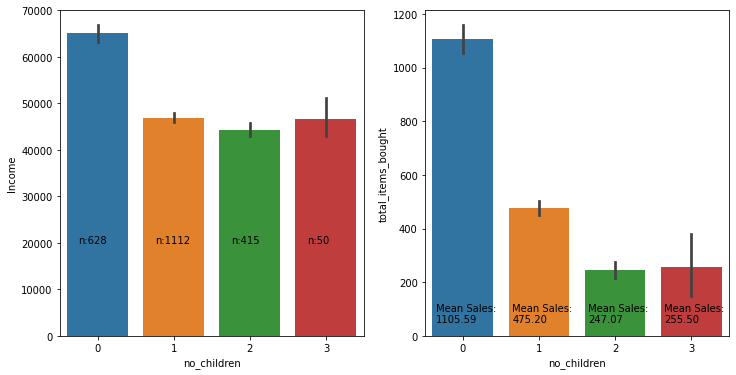

In [25]:
fig, (ax0,ax1) = plt.subplots(1,2,figsize=(12,6), sharex=True)
_ = sns.barplot(x= market.no_children, y= market.Income, ax=ax0)
_ = sns.barplot(x= market.no_children, y= market.total_items_bought, ax=ax1)
ax0.text(s= f"n:{market[market['no_children']==0]['no_children'].count()}", x = -0.25, y = 20000)
ax0.text(s= f"n:{market[market['no_children']==1]['no_children'].count()}", x = 0.75, y = 20000)
ax0.text(s= f"n:{market[market['no_children']==2]['no_children'].count()}", x = 1.75, y = 20000)
ax0.text(s= f"n:{market[market['no_children']==3]['no_children'].count()}", x = 2.75, y = 20000)

ax1.text(s = f"Mean Sales: \n{market[market['no_children']==0]['total_items_bought'].mean():.2f}", x = -0.35, y = 50)
ax1.text(s = f"Mean Sales: \n{market[market['no_children']==1]['total_items_bought'].mean():.2f}", x = 0.65, y = 50)
ax1.text(s = f"Mean Sales: \n{market[market['no_children']==2]['total_items_bought'].mean():.2f}", x = 1.65, y = 50)
ax1.text(s = f"Mean Sales: \n{market[market['no_children']==3]['total_items_bought'].mean():.2f}", x = 2.65, y = 50)

The families with no children earn and spend more than families with children. 

## Clustering

### Scaling the data

In [26]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
le = LabelEncoder()
ss = StandardScaler()

In [27]:
ss_market = market.copy()

cols = ss_market.select_dtypes(exclude='object').columns
ss_market[cols] = ss.fit_transform(ss_market[cols])

In [28]:
# getting categorical columns and their indices.
catColumnsPos = [ss_market.columns.get_loc(col) for col in list(ss_market.select_dtypes('object').columns)]
print('Categorical columns           : {}'.format(list(ss_market.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['Education', 'Marital_Status']
Categorical columns position  : [0, 1]


In [29]:
from kmodes.kprototypes import KPrototypes

dfMatrix = ss_market.to_numpy()

In [30]:
cost = []
for x in range(2,6):
    kprototype = KPrototypes(n_jobs = -1, n_clusters = x, init = 'Huang', random_state = 0)
    clusters = kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)
    cost.append(kprototype.cost_)
    print('Cluster initiation: {}'.format(clusters))

Cluster initiation: [1 0 1 ... 1 1 0]
Cluster initiation: [1 0 2 ... 2 2 0]
Cluster initiation: [0 2 0 ... 0 1 2]
Cluster initiation: [1 0 1 ... 2 2 0]


In [31]:
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame()
df_cost['clusters'] = range(2,6)
df_cost['cost'] = cost

<AxesSubplot:xlabel='clusters', ylabel='cost'>

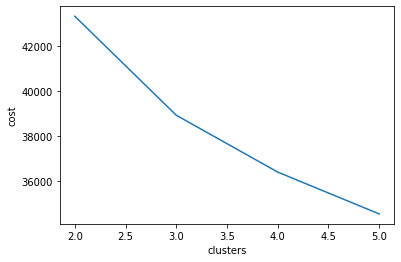

In [32]:
# elbow method for number of clusters
sns.lineplot(x='clusters', y= 'cost', data=df_cost)

I'll go with 4 clusters. Let's see how their purchasing behaviours are.

In [33]:
# Kmeans tuned
kprototype = KPrototypes(n_jobs = -1, n_clusters = 4, init = 'Huang', random_state = 0)
clusters = kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)

In [34]:
market['clusters'] = clusters

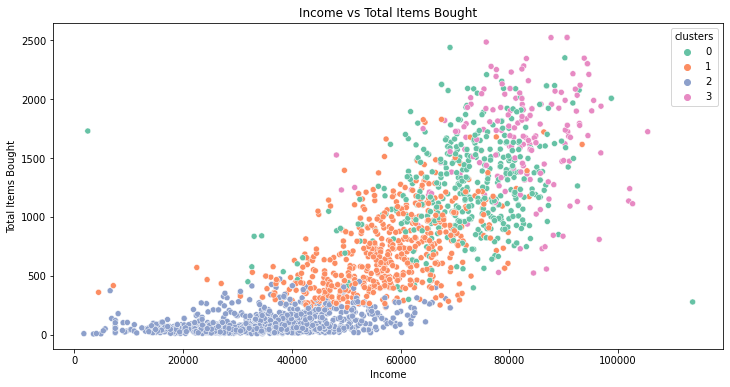

In [35]:
plt.figure(figsize=(12,6))

_ = sns.scatterplot(x ='Income',
                    y = 'total_items_bought',
                    data = market,
                    hue='clusters',
                   palette = 'Set2')
_ = plt.title('Income vs Total Items Bought')
_ = plt.ylabel('Total Items Bought')

Now our clusters are set, we need to visualize and get descriptives of the data according to clusters.

However, from what I got we can conclude that; there are 4 clusters of the customers. 

Regular (cluster2), Bronze (cluster 1), Premium (cluster 0),and Gold Customers (cluster 3) (couldn't come up with a better idea)



Let's see specifications of these clusters:

In [36]:
market.groupby(['clusters']).agg(['mean','sum'])

Income               Kidhome       Teenhome         Recency  \
                  mean         sum      mean  sum      mean  sum       mean   
clusters                                                                      
0         72011.923077  31829270.0  0.045249   20  0.219457   97  50.371041   
1         57160.939446  33039023.0  0.268166  155  0.960208  555  47.731834   
2         34215.416667  34489140.0  0.785714  792  0.440476  444  49.274802   
3         81747.378531  14469286.0  0.045198    8  0.118644   21  48.265537   

                   MntWines          MntFruits        MntMeatProducts          \
            sum        mean     sum       mean    sum            mean     sum   
clusters                                                                        
0         22264  506.599548  223917  72.131222  31882      412.934389  182517   
1         27589  444.723183  257050  19.946367  11529      129.044983   74588   
2         49669   39.633929   39951   4.911706   4951       22.539683   22720   
3          8543  871.045198  154175  55.689266   9857      478.463277   84688   

         MntFishProducts        MntSweetProducts        MntGoldProds         \
                    mean    sum             mean    sum         mean    sum   
clusters                                                                      
0             104.330317  46114        70.631222  31219    76.536199  33829   
1              26.785467  15482        20.773356  12007    58.669550  33911   
2               7.355159   7414         5.058532   5099    15.419643  15543   
3              80.468927  14243        64.932203  11493    78.322034  13863   

         NumDealsPurchases       NumWebPurchases       NumCatalogPurchases  \
                      mean   sum            mean   sum                mean   
clusters                                                                     
0                 1.445701   639        5.253394  2322            5.622172   
1                 3.939446  2277        6.316609  3651            2.977509   
2                 1.995040  2011        2.080357  2097            0.539683   
3                 1.045198   185        5.491525   972            6.118644   

               NumStorePurchases       NumWebVisitsMonth       AcceptedCmp3  \
           sum              mean   sum              mean   sum         mean   
clusters                                                                      
0         2485          8.479638  3748          3.015837  1333     0.052036   
1         1721          7.636678  4414          5.835640  3373     0.062284   
2          544          3.194444  3220          6.473214  6525     0.075397   
3         1083          8.242938  1459          3.033898   537     0.158192   

             AcceptedCmp4     AcceptedCmp5      AcceptedCmp1     AcceptedCmp2  \
         sum         mean sum         mean  sum         mean sum         mean   
clusters                                                                        
0         23     0.029412  13     0.000000    0     0.090498  40     0.000000   
1         36     0.128028  74     0.005190    3     0.029412  17     0.012111   
2         76     0.009921  10     0.000000    0     0.000992   1     0.001984   
3         28     0.378531  67     0.892655  158     0.474576  84     0.118644   

              Complain     Z_CostContact       Z_Revenue         Response  \
         sum      mean sum          mean   sum      mean    sum      mean   
clusters                                                                    
0          0  0.009050   4             3  1326        11   4862  0.156109   
1          7  0.005190   3             3  1734        11   6358  0.115917   
2          2  0.011905  12             3  3024        11  11088  0.089286   
3         21  0.005650   1             3   531        11   1947  0.604520   

              no_children       total_items_bought          \
          sum        mean   sum               mean     sum   
cluster

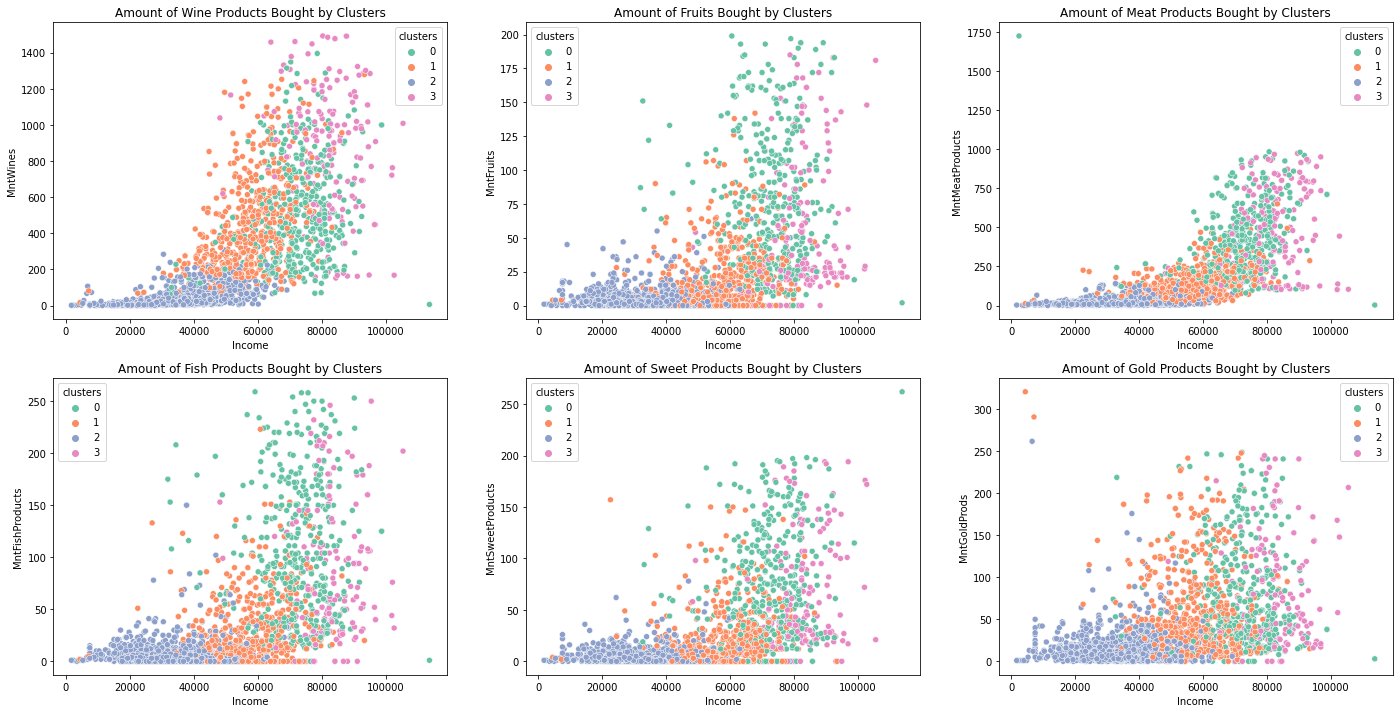

In [37]:
fig, ax = plt.subplots(2,3, figsize = (24,12))
_ =  sns.scatterplot(x ='Income',y = 'MntWines', data = market, hue= 'clusters', palette = 'Set2', ax = ax[0,0])
_ =  sns.scatterplot(x ='Income',y = 'MntFruits', data = market, hue= 'clusters', palette = 'Set2', ax = ax[0,1])
_ =  sns.scatterplot(x ='Income',y = 'MntMeatProducts', data = market, hue= 'clusters', palette = 'Set2', ax = ax[0,2])
_ =  sns.scatterplot(x ='Income',y = 'MntFishProducts', data = market, hue= 'clusters', palette = 'Set2',ax= ax[1,0])
_ =  sns.scatterplot(x ='Income',y = 'MntSweetProducts', data = market, hue= 'clusters', palette = 'Set2', ax= ax[1,1])
_ =  sns.scatterplot(x ='Income',y = 'MntGoldProds', data = market, hue= 'clusters', palette = 'Set2', ax = ax[1,2])

_ = ax[0,0].set_title('Amount of Wine Products Bought by Clusters')
_ = ax[0,1].set_title('Amount of Fruits Bought by Clusters')
_ = ax[0,2].set_title('Amount of Meat Products Bought by Clusters')
_ = ax[1,0].set_title('Amount of Fish Products Bought by Clusters')
_ = ax[1,1].set_title('Amount of Sweet Products Bought by Clusters')
_ = ax[1,2].set_title('Amount of Gold Products Bought by Clusters')

## Observation

### Scatters

Cluster 3 (gold customers) obviously earn the biggest amount among other clusters yet they are not the highest buyers of some items such as Fruits, Gold products.

Almost for any product, the highest buyers are Gold or Premium custormers. I think there are 2 ways for this shop;
    the first one is to keep current gold and premium customers buy their products, and make some exclusive deals for them - For example some deals for high / moderate quality wine and cheese with it. 
    The second one is to attract customers in lower clusters (regular and bronze). I don't know the product range of this shop, maybe all items are more expensive than other shops or the items are high quality items which cost more. Without proper knowledge, it can be suggested that one of both wheter increase the product range (low- medium and high quality) for anyone can purchase; or create deals to attract low-middle incomed customers. 
    
    

### Grouped table - number of purchases

1. It is obvious that Cluster 1 follows deals. I suggest, keep track of their purchasing behaviours, and react with deals according to change.
2. Bronze, gold and premium customers choose online shopping. Let's create e-mail subscriptions, instagram accounts (if not present) etc to reach potential customers in these clusters. Also, be sure current customers know about deals, discounts etc.
3. Premium and gold customers make catalog buying. Catalog buying means buying with e-mail order and requires shipping to the adress. Shipping deals or free shipping would be a good idea. And make sure if the items received in time!.
4. Store purchases are similar, the above mentioned suggestions would be good for this also.
5. Number of web visits and online shopping give good results: Regular customers visit web page a lot, but they aren't buying stuff. However premium and gold customers visit web page less. I am thinking that these premium and gold customers know what they are buying, won't spend too much time online. Regular customers can be a good online shoppers. They mostly buy wine and meat products.

